# PARTICLE SWARM OPTIMIZATION ALGORITHMS with BENCHMARK TESTS

Fig.1.

![springer](https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs13762-018-1970-x/MediaObjects/13762_2018_1970_Fig1_HTML.png?as=webp)



The Particle swarm optimization (PSO) is one of the most popular metaheuristic methods proposed by (Kennedy and Eberhart 1995). The PSO emulates the social behavior of birds to search the food sources in which these birds share the information between them (the position of each one and the nearest particle to the source of food). In the PSO method, the position xi of each particle represents the solution of the given problem and the best solution represents the source of solution. In the PSO method, each particle has its own memory to save the previous best position reached by the particle and the global best position of the entire population (that belongs to it). According to the information saved in the memory of each individual (particle) and its velocity vi, it can update its position 𝑥𝑖(𝑡+1) as in Fig. 1.


In general, the PSO method represents the population by X, where this population is generated using a random number generator according to the following equation:

𝑋=𝐿+𝑟𝑎𝑛𝑑×(𝑈−𝐿)

where L and U represent the lower and upper boundaries, respectively, of the search domain of the given problem. Each individual/particle xi of X can update its velocity (vi) using the following equation:

𝑣𝑖(𝑡+1)=𝑤𝑣𝑖(𝑡)+𝑐1𝑟1(𝑥𝑝𝑖(𝑡)−𝑥𝑖(𝑡))+𝑐2𝑟2(𝑥𝑔𝑖(𝑡)−𝑥𝑖(𝑡))


where c1, r1, c2, and r2 represent random numbers, in which w is an inertia weight used to improve the speed of convergence; meanwhile, c1 and c2 represent the coefficients of acceleration, and t represents the current time (iteration).

Thereafter, the position of particle xi is updated as

𝑥𝑖=𝑥𝑖+𝑣𝑖


The next step in the PSO model is to evaluate the quality of each particle through computing the fitness function. Then the global best solution (𝑥𝑔𝑖) is determined, also, the best position that the current particle (𝑥𝑝𝑖) reached is determined (also, called best personal position). These previous steps are performed until the stopping conditions are met. The final steps of the PSO algorithm are given in Algorithm 1.


### Algorithm 1: The particle swarm optimization algorithm
* 1- Initialize the parameters such as number of particles N, dimension d, and lower (L) and upper (U) boundaries of the search space.
* 2- Generate random solutions (X).
* 3- Generate a random velocity for each solution (vi).
* 4- While (termination criterion doesn’t meet)
* 5- For each particle in X
* 6- Compute the objective function value.
* 7- Update the best personal position (𝑥𝑝𝑖).
* 8- Update the global best position (𝑥𝑔).
* 9- Update a new velocity using Eq. (2).
* 10- Update the position of current particle using Eq. (3).
* 11- End For
* 12- Return the global best solution (𝑥𝑔).



*Elsheikh, A.H., Abd Elaziz, M. Review on applications of particle swarm optimization in solar energy systems. Int. J. Environ. Sci. Technol. 16, 1159–1170 (2019). https://doi.org/10.1007/s13762-018-1970-x*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

def create_benchmark(function):
  
  if function == "Rosenbrock":
    a=(-10,10)
    x = np.linspace(-10,10,100)
    y = np.linspace(-10,10,100)
    x,y = np.meshgrid(x,y)
    def fx(x,y): return 100*((x-y**2))**2+(x-1)**2
    return 100*((x-y**2))**2+(x-1)**2,x,y,a,fx

  if function == "Rastgrin":
    a=(-5.12,5.12)
    x = np.linspace(-5.12, 5.12, 100)     
    y = np.linspace(-5.12, 5.12, 100) 
    x,y = np.meshgrid(x,y)
    def fx(x,y) : return (x**2 - 10 * np.cos(2 * np.pi * x))+(y**2 - 10 * np.cos(2 * np.pi * y))
    return (x**2 - 10 * np.cos(2 * np.pi * x))+(y**2 - 10 * np.cos(2 * np.pi * y)) + 20, x,y,a,fx  
  
  if function == "Ackley":
    a=(-32.768, 32.768)
    r_min, r_max = -32.768, 32.768
    xaxis = np.arange(r_min, r_max, 2.0)
    yaxis = np.arange(r_min, r_max, 2.0)
    x, y = np.meshgrid(xaxis, yaxis)
    def fx(x,y) : return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20,x,y,a,fx  
  
  if function == "Sphere":
    a=(-100,100)
    x, y = np.array(np.meshgrid(np.linspace(-100,100,100), np.linspace(-100,100,100)))
    def fx(x,y) : return (4/3)*math.pi*x**3
    return (4/3)*math.pi*x**3, x,y,a,fx  
  
  if function == "Beale":
    a=(-4.5,4.5)
    x, y = np.array(np.meshgrid(np.linspace(-4.5,4.5,100), np.linspace(-4.5,4.5,100)))
    def fx(x,y) : return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2,x,y,a,fx
  
  if function == "Goldstein-Price":
    a=(-2,2)
    x, y = np.array(np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100)))
    def fx(x,y) : return (1+(x+y+1)**2*(19-14*x+3*x**2-14*y+6*x*y+3*y**2))*(30+(2*x-3*y)**2*(18-32*x+12*x**2+48*y-36*x*y+27*y**2))
    return (1+(x+y+1)**2*(19-14*x+3*x**2-14*y+6*x*y+3*y**2))*(30+(2*x-3*y)**2*(18-32*x+12*x**2+48*y-36*x*y+27*y**2)),x,y,a,fx
  
  if function == "Booth":
    a=(-10,10)
    x, y = np.array(np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100)))
    def fx(x,y) : return (x+(2*y)-7)**2+(((2*x)+y+5)**2)
    return (x+(2*y)-7)**2+(((2*x)+y+5)**2),x,y,a,fx

  if function == "Bukin":
    a=(-15,-5)
    x, y = np.array(np.meshgrid(np.linspace(-15,-5,100), np.linspace(-3,3,100)))
    def fx(x,y) : return 100*np.sqrt(np.abs(y-(0.01*(x**2))))+np.abs(x*10)*0.01
    return 100*np.sqrt(np.abs(y-(0.01*(x**2))))+np.abs(x*10)*0.01,x,y,a,fx

  if function == "Matyas":
    a=(-10,10)
    x, y = np.array(np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100)))
    def fx(x,y) : return 0.26*(x**2+y**2)-(0.48*x*y)
    return 0.26*(x**2+y**2)-(0.48*x*y),x,y,a,fx

  if function == "Levi":
    a=(-10,10)
    x, y = np.array(np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100)))
    def fx(x,y) : return np.sin(3*np.pi*x)**2 + (x-1)**2*(1+np.sin(3*np.pi*y)*np.sin(3*np.pi*y))+ (y-1)*(y-1)*(1+np.sin(2*np.pi*y)*np.sin(2*np.pi*y))
    return np.sin(3*np.pi*x)**2 + (x-1)**2*(1+np.sin(3*np.pi*y)*np.sin(3*np.pi*y))+ (y-1)*(y-1)*(1+np.sin(2*np.pi*y)*np.sin(2*np.pi*y)),x,y,a,fx

  if function == "Himmelblau":
    a=(-5,5)
    x, y = np.array(np.meshgrid(np.linspace(-5,5,100), np.linspace(-5,5,100)))
    def fx(x,y) : return (((x**2+y-11)**2) + (((x+y**2-7)**2)))
    return (((x**2+y-11)**2) + (((x+y**2-7)**2))),x,y,a,fx

  if function == "Three hump camel":
    a=(-5,5)
    x, y = np.array(np.meshgrid(np.linspace(-5,5,100), np.linspace(-5,5,100)))
    def fx(x,y) : return ((2*(x**2)-1.05*(x**4)+((x**6)/6)+(x*y)+(y**2)))
    return ((2*(x**2)-1.05*(x**4)+((x**6)/6)+(x*y)+(y**2))),x,y,a,fx

  if function == "Easom":
    a=(-100,100)
    x, y = np.array(np.meshgrid(np.linspace(-100,100,100), np.linspace(-100,100,100)))
    def fx(x,y) : return -(np.cos(x)*np.cos(y))*np.exp(-(x-math.pi)**2-(y-math.pi)**2)
    return -(np.cos(x)*np.cos(y))*np.exp(-(x-math.pi)**2-(y-math.pi)**2),x,y,a,fx

  if function == "Cross in tray":
    c=(-10,10)
    x, y = np.array(np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100)))
    a=np.fabs(100-np.sqrt(x*x+y*y)/np.pi)
    b=np.fabs(np.sin(x)*np.sin(y)*np.exp(a))+1
    def fx(x,y) : return -0.0001*(np.fabs(np.sin(x)*np.sin(y)*np.exp(np.fabs(100-np.sqrt(x*x+y*y)/np.pi)))+1)**0.1
    return fx(x,y),x,y,c,fx

  if function == "Egg holder":
    c=(-512,512)
    x, y = np.array(np.meshgrid(np.linspace(-512,512,100), np.linspace(-512,512,100)))
    a=np.sqrt(np.fabs(y+x/2+47))
    b=np.sqrt(np.fabs(x-(y+47)))
    def fx(x,y) : return -(y+47)*np.sin(np.sqrt(np.fabs(y+x/2+47)))-x*np.sin(np.sqrt(np.fabs(x-(y+47))))
    return -(y+47)*np.sin(a)-x*np.sin(b),x,y,c,fx

  if function == "McCormick":
    a=(-1.5,4)
    x, y = np.array(np.meshgrid(np.linspace(-1.5,4,100), np.linspace(-3,4,100)))
    def fx(x,y) : return np.sin(x+y)+(x-y)**2-(1.5*x)+(2.5*y)+1
    return np.sin(x+y)+(x-y)**2-(1.5*x)+(2.5*y)+1,x,y,a,fx

  if function == "Schaffer":
    a=(-50,50)
    x = np.linspace(-50,50)
    y = np.linspace(-50,50)
    x,y = np.meshgrid(x,y)
    def fx(x,y) : return 0.5+(np.sin(x**2-y**2)-0.5)**2/((1+0.001*(x**2+y**2)))**2
    return 0.5+(np.sin(x**2-y**2)-0.5)**2/((1+0.001*(x**2+y**2)))**2,x,y,a,fx

  if function == "Stiblinski-tag":
    a=(-5,5)
    x = np.arange(-5, 5, 0.25)
    y = np.arange(-5, 5, 0.25)
    x, y = np.meshgrid(x, y)
    def fx(x,y) : return 0.5 * ((x**4 + y**4) - 16 * (x**2 + y**2)+ 5 * (x + y))
    return 0.5 * ((x**4 + y**4) - 16 * (x**2 + y**2)+ 5 * (x + y)),x,y,a,fx

  if function == "Salomon":
    a=(-10,10)
    x = np.arange(-100, 100)
    y = np.arange(-10, 10)
    x, y = np.meshgrid(x, y)
    r = x**2+y**2
    def fx(x,y) : return 1-np.cos(2 * np.pi * np.sqrt(x**2+y**2) + 0.1 * np.sqrt(x**2+y**2))
    return 1-np.cos(2 * np.pi * np.sqrt(r) + 0.1 * np.sqrt(r)),x,y,a,fx

  if function == "Objective":
    a = (0,5)
    x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))

    def fx(x,y) : return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73), x,y,a,fx

  if function == "Parabolic":
    a = (0,5)
    x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
    def fx(x,y) : return x**2+y**2
    return x**2+y**2, x,y,a,fx

def update():

    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = fx(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()    

def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot

In [2]:
List_of_functions= ["Rosenbrock", "Rastgrin",
                    "Ackley","Sphere","Beale",
                    "Goldstein-Price","Booth",
                    "Bukin","Matyas","Levi",
                    "Himmelblau","Three hump camel",
                    "Easom","Cross in tray","Egg holder",
                    "McCormick","Schaffer","Stiblinski-tag",
                    "Salomon","Objective","Parabolic"] # Objective function is machinelearningmastery's term, I dont know original term

                    # Some function doesnt work properly
                      # Bukin, Salamon, 
                    # You can read about this Benchmark test from: 
                        # https://en.wikipedia.org/wiki/Test_functions_for_optimization
                    # I use base code from:
                        # https://machinelearningmastery.com/a-gentle-introduction-to-particle-swarm-optimization/
                    # The code is still not quite good. In the future, I intend to improve it further.
                        # I suggest before running the code read machinelearningmastery's article.
# Acknowledge: I would like to thank Prof. A.Egemen Yılmaz for explaining the basics of this subject to me.

In [3]:
# Select test

z,x,y,a,fx = create_benchmark("Objective") # I use Objective function default, because of original code source
# My best choice is absolutely Rastgrin

#### Rastgrin function test

[YouTube link](https://youtu.be/t7dEQ-p8VG0)

In [4]:
# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
x_max = x.ravel()[z.argmax()]
y_max = y.ravel()[z.argmax()]

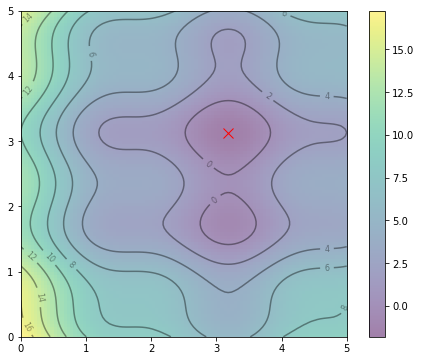

In [5]:
plt.figure(figsize=(8,6))
plt.imshow(z, extent=[a[0],a[1],a[0],a[1]], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=10, color="red")
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
plt.show()

In [6]:
# Hyper-parameter of the algorithm
c1 = 0.8
c2 = 0.8
w = 0.6

In [7]:
# Create particles
n_particles = 40
np.random.seed(100)
# Values of particles
X = np.random.rand(2, n_particles) * 5
# Set random velocity for each particle
V = np.random.randn(2, n_particles) * 0.1

In [8]:
# Initialize data
pbest = X
pbest_obj = fx(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

(0.0, 5.0)

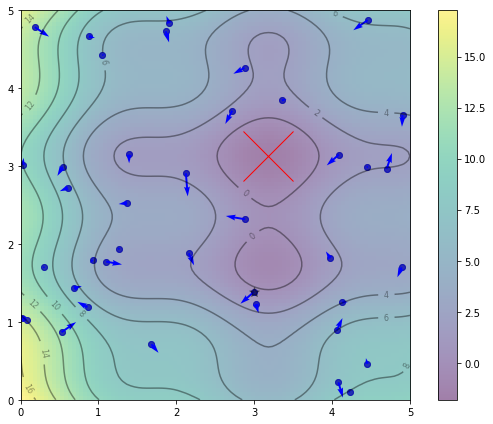

In [9]:
# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)

img = ax.imshow(z, extent=[a[0],a[1],a[0],a[1]], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=50, color="red")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([a[0],a[1]])
ax.set_ylim([a[0],a[1]])


In [10]:
# This score is just first iteration, please check again score after the animation. 

print("PSO found best solution at fx({})={}".format(gbest, gbest_obj))
print("Global optimal at fx({})={}".format([x_min,y_min], fx(x_min,y_min)))

PSO found best solution at fx([2.99421688 1.38382531])=0.3668918708631955
Global optimal at fx([3.1818181818181817, 3.131313131313131])=-1.8082706615747688


In [11]:
# Set iteration of update function and frame interval

iteration = list(range(1,50))
anim = FuncAnimation(fig, animate, frames=iteration, interval=100, blit=False, repeat=True)
anim
from IPython.display import HTML
HTML(anim.to_html5_video())

# If you run this code one more time; I suggest restart all code. 
# Because of updateing code implemented in animation code.

In [12]:
print("PSO found best solution at fx({})={}".format(gbest, gbest_obj))
print("Global optimal at fx({})={}".format([x_min,y_min], fx(x_min,y_min)))

PSO found best solution at fx([3.18515535 3.12980272])=-1.8083520359224976
Global optimal at fx([3.1818181818181817, 3.131313131313131])=-1.8082706615747688


![last](https://sd.keepcalms.com/i-w600/please-follow-me-and-like-this.jpg)